# Finding Arsenal a New Left Back

In [66]:
import sqlite3
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mplsoccer.utils import FontManager
from matplotlib.font_manager import FontProperties

conn = sqlite3.connect(r"C:\Users\Owner\dev\23_24_player_stats\data\23_24_player_stats.db")
cursor = conn.cursor()
cursor.execute("""SELECT
    possession.Player,
    possession.Age,
    possession.[90s],
    possession.[Squad],
    possession.Comp,
    possession.PrgC as "Progressive Carries",
    possession.PrgR as "Progressive Passes Received",
    possession."Att 3rd" as "Touches in Att 3rd",
    possession."Tk On Succ" as "Successful Take-ons",
    possession."CPA" as "Carries into Penalty Area",
    passing.KP as "Key Passes"
FROM possession
JOIN passing on passing.Player = possession.Player
WHERE possession.[90s] > 10.0 AND possession.[Pos] like 'DF%'""")
rows = cursor.fetchall()
column_names = [description[0] for description in cursor.description]
df = pd.DataFrame(rows, columns=column_names)
print(df)
conn.close()

                Player   Age   90s           Squad                Comp  \
0    Aaron Wan-Bissaka  25.0  19.8  Manchester Utd  eng Premier League   
1         Aarón Martín  26.0  15.3           Genoa          it Serie A   
2         Abakar Sylla  20.0  19.9      Strasbourg          fr Ligue 1   
3          Abdel Abqar  24.0  25.7          Alavés          es La Liga   
4          Abdul Mumin  25.0  18.8  Rayo Vallecano          es La Liga   
..                 ...   ...   ...             ...                 ...   
641        Álex Moreno  30.0  11.5     Aston Villa  eng Premier League   
642        Álex Suárez  30.0  28.5      Las Palmas          es La Liga   
643     Édgar González  26.0  28.0         Almería          es La Liga   
644     Óscar Mingueza  24.0  33.3      Celta Vigo          es La Liga   
645    Óscar de Marcos  34.0  25.1   Athletic Club          es La Liga   

     Progressive Carries  Progressive Passes Received  Touches in Att 3rd  \
0                   1.52          

In [67]:
# Columns to standardize and calculate average score
metrics_columns = ['Progressive Carries', 'Progressive Passes Received', 'Touches in Att 3rd', 
                   'Successful Take-ons', 'Carries into Penalty Area', 'Key Passes']

# Standardize the metrics
scaler = StandardScaler()
standardized_metrics = scaler.fit_transform(df[metrics_columns])

# Convert back to DataFrame
standardized_df = pd.DataFrame(standardized_metrics, columns=metrics_columns)

# Calculate average score
df['Average Score'] = standardized_df.mean(axis=1)

display(df.sort_values(by="Average Score", ascending=False).head(25))

,Player,Age,90s,Squad,Comp,Progressive Carries,Progressive Passes Received,Touches in Att 3rd,Successful Take-ons,Carries into Penalty Area,Key Passes,Average Score
277,Jeremie Frimpong,22.0,25.0,Leverkusen,de Bundesliga,6.120,13.900,31.40,1.920,2.920,1.80,4.432856
35,Alphonso Davies,22.0,22.9,Bayern Munich,de Bundesliga,5.280,6.070,24.40,3.060,1.530,1.62,3.170641
558,Samuel Lino,23.0,23.1,Atlético Madrid,es La Liga,5.670,9.310,24.10,1.730,1.900,1.47,3.139020
630,Yan Couto,21.0,24.9,Girona,es La Liga,6.060,9.640,26.10,1.930,1.650,1.08,3.071020
547,Rodrigo Riquelme,23.0,17.0,Atlético Madrid,es La Liga,5.120,9.760,26.90,1.410,1.650,1.65,2.942225
353,Leonardo Spinazzola,30.0,14.6,Roma,it Serie A,7.400,5.070,21.80,1.370,1.510,1.85,2.850921
6,Achraf Hakimi,24.0,21.5,Paris S-G,fr Ligue 1,3.910,10.700,38.80,1.260,1.020,2.00,2.765004
204,Franck Honorat,26.0,26.1,Gladbach,de Bundesliga,3.720,9.270,26.10,0.800,1.000,3.41,2.636934
310,João Cancelo,29.0,27.8,Barcelona,es La Liga,3.810,6.940,24.10,2.190,1.400,1.26,2.491301
474,Nicola Zalewski,21.0,10.8,Roma,it Serie A,5.000,5.740,18.50,1.480,1.480,1.57,2.373489


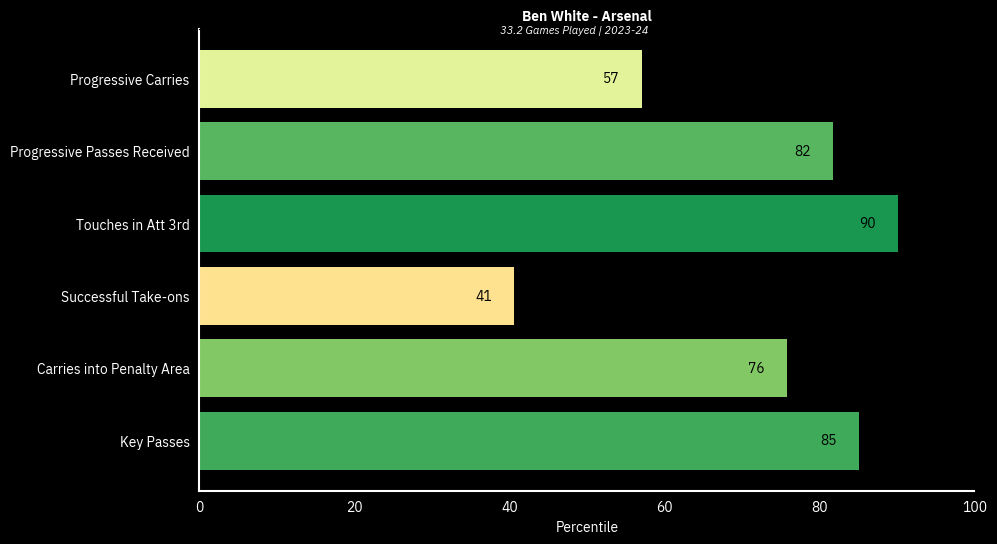

In [68]:
percentiles_df = df.copy()
for metric in metrics_columns:
    percentiles_df[metric] = percentiles_df[metric].rank(pct=True)


player_name = "Ben White"
player_data = percentiles_df[percentiles_df['Player'] == player_name]

metrics = metrics_columns
values = player_data[metrics].values.flatten() * 100

# Create a color map
norm = plt.Normalize(0,100)
colors = cm.RdYlGn(norm(values))

font_normal = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/ibmplexsans/IBMPlexSans-Regular.ttf')
font_italic = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/ibmplexsans/IBMPlexSans-Italic.ttf')
font_bold = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/ibmplexsans/IBMPlexSans-Bold.ttf')

# Plotting
plt.figure(figsize=(10, 6), facecolor='black')
bars = plt.barh(metrics, values, color=colors)
plt.xlabel('Percentile', color='white', fontproperties=font_normal.prop)
plt.title(f'{player_name} - {df[df["Player"] == player_name]["Squad"].values[0]}', color='white', fontproperties=font_bold.prop)
plt.suptitle(f'{df[df["Player"] == player_name]["90s"].values[0]} Games Played | 2023-24', color='white', fontsize=8, y=0.885, fontproperties=font_italic.prop)
plt.gca().invert_yaxis()
plt.gca().set_facecolor('black')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['top'].set_color('black')
plt.gca().spines['right'].set_color('black')
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.xlim(0, 100)
plt.xticks(color='white', fontproperties=font_normal.prop)
plt.yticks(color='white', fontproperties=font_normal.prop)

for bar in bars:
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}', va='center', color='black', fontproperties=font_normal.prop)

plt.show()

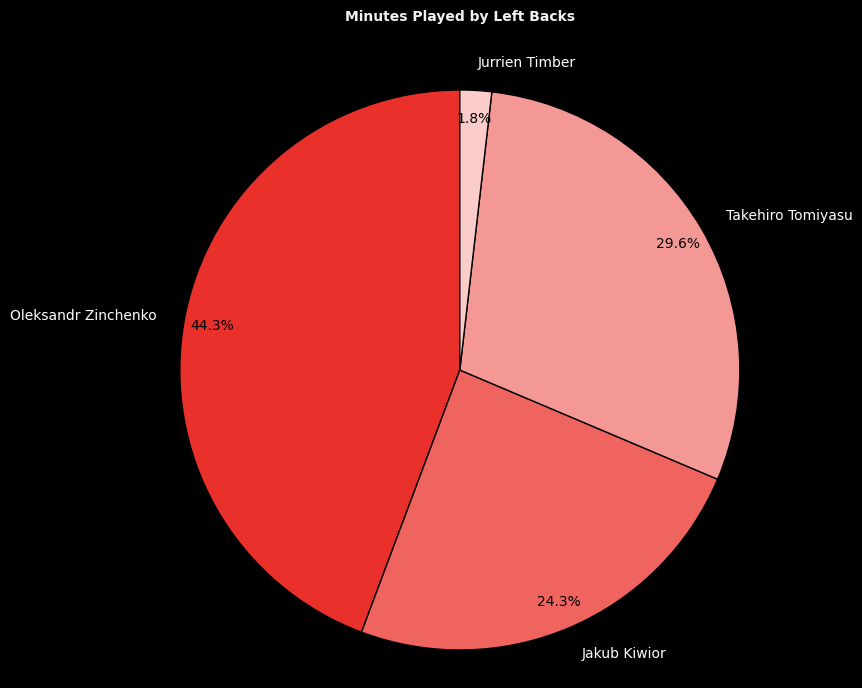

In [88]:
# Data for left backs and their minutes
left_back_mins = {
    "player": ["Oleksandr Zinchenko", "Jakub Kiwior", "Takehiro Tomiyasu", "Jurrien Timber"],
    "minutes": [1722, 946, 1149, 71]
}

# Colors for the slices
colors = ['#e9302a', '#ef645f', '#f49895', '#faccca']

# Font properties
font_bold = FontProperties()
font_bold.set_weight('bold')

# Create the pie chart with a larger figure size
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(left_back_mins["minutes"], labels=left_back_mins["player"], colors=colors, autopct='%1.1f%%', startangle=90,
                                  wedgeprops={'edgecolor': 'black'}, pctdistance=0.9)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add title with more space from the plot
plt.title('Minutes Played by Left Backs', fontsize=16, color="#F2F2F2", fontproperties=font_bold, pad=30)

# Set the background color
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Change the color of the text to white except the percentage text in pie
for text in texts:
    text.set_color('white')
for autotext in autotexts:
    autotext.set_color('black')

# Show the pie chart
plt.show()